# SQL Practice Problems

This workbook contains responses to practice SQL problems using the Northwind_SPP database and pandasql, which can treat pandas data frames as if they were tables and uses SQLite syntax.

<br>**Index**
<br>[Introductory Problems Q1-19](#Introductory_Problems)
<br>[Intermediate Problems Q20-31](#Intermediate_Problems)
<br>Advanced Problems Q32-57


## Database Diagram

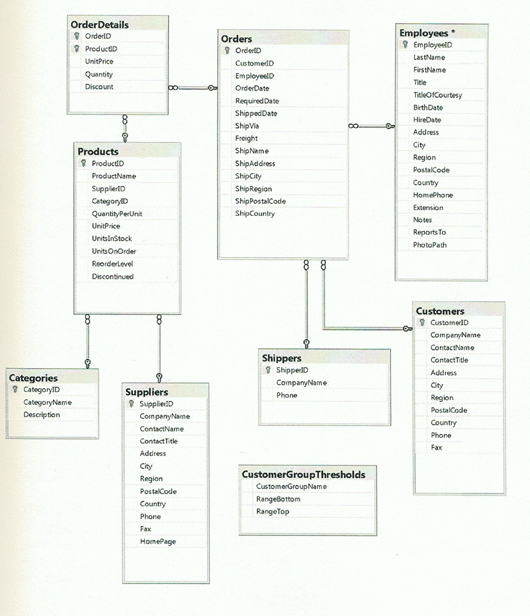

## Setup

In [1]:
import pandas as pd
from pandasql import sqldf

## Import tables

In [156]:
#pwd
filepath = '/Users/shanecaglar/Desktop/SQL Practice Problems/'
Shippers = pd.read_csv(filepath + 'Shippers.csv')
Categories = pd.read_csv(filepath + 'Categories.csv')
Employees = pd.read_csv(filepath + 'Employees.csv',parse_dates=[5])
Orders = pd.read_csv(filepath + 'Orders.csv',parse_dates=[3])
Suppliers = pd.read_csv(filepath + 'Suppliers.csv')
Products = pd.read_csv(filepath + 'Products.csv')
OrderDetails = pd.read_csv(filepath + 'OrderDetails.csv')
Customers = pd.read_csv(filepath + 'Customers.csv')

<a id='Introductory_Problems'></a>

## Introductory Problems


## 1. Return all the fields from all the Shippers table

In [17]:
query = """
        SELECT *
        FROM Shippers

        """
print(sqldf(query,locals()))

   ShipperID       CompanyName           Phone
0          1    Speedy Express  (503) 555-9831
1          2    United Package  (503) 555-3199
2          3  Federal Shipping  (503) 555-9931


## 2. Return the Category Name and Description fields from the Categories table


In [25]:
query = """
        SELECT 
            CategoryName,
            Description
        FROM Categories

        """
print(sqldf(query,locals()))

     CategoryName                                        Description
0       Beverages        Soft drinks, coffees, teas, beers, and ales
1      Condiments  Sweet and savory sauces, relishes, spreads, an...
2     Confections                Desserts, candies, and sweet breads
3  Dairy Products                                            Cheeses
4  Grains/Cereals                Breads, crackers, pasta, and cereal
5    Meat/Poultry                                     Prepared meats
6         Produce                          Dried fruit and bean curd
7         Seafood                                   Seaweed and fish


## 3. Return the First Name, Last Name and Hire Date for Sales Representatives

In [31]:
query = """
        SELECT 
            FirstName,
            LastName,
            HireDate
        FROM Employees
        WHERE Title = 'Sales Representative'

        """
print(sqldf(query,locals()))

  FirstName   LastName       HireDate
0     Nancy    Davolio    1/5/10 0:00
1     Janet  Leverling    1/4/10 0:00
2  Margaret    Peacock    3/5/11 0:00
3   Michael     Suyama  17/10/11 0:00
4    Robert       King    2/1/12 0:00
5      Anne  Dodsworth  15/11/12 0:00


## 4. Return the First Name, Last Name and Hire Date for Sales Representatives in the United States

In [33]:
query = """
        SELECT 
            FirstName,
            LastName,
            HireDate
        FROM Employees
        WHERE Title = 'Sales Representative' AND Country = 'USA'

        """
print(sqldf(query,locals()))

  FirstName   LastName     HireDate
0     Nancy    Davolio  1/5/10 0:00
1     Janet  Leverling  1/4/10 0:00
2  Margaret    Peacock  3/5/11 0:00


## 5. Show all of the orders and order dates for those placed by Employee ID 5

In [41]:
query = """
        SELECT
            OrderID,
            OrderDate    
        FROM Orders
        WHERE EmployeeID = '5' LIMIT 5

        """
print(sqldf(query,locals()))

   OrderID      OrderDate
0    10248    4/7/14 8:00
1    10254   11/7/14 2:00
2    10269   31/7/14 0:00
3    10297   4/9/14 21:00
4    10320  3/10/14 12:00


## 6. Show the SupplierID, ContactName and ContactTitle for suppliers whose ContactTitle is *not* Marketing Manager

In [43]:
query = """
        SELECT
            SupplierID,
            ContactName,
            ContactTitle
        FROM Suppliers
        WHERE ContactTitle <> 'Marketing Manager' LIMIT 5

        """
print(sqldf(query,locals()))

   SupplierID                 ContactName              ContactTitle
0           1            Charlotte Cooper        Purchasing Manager
1           2               Shelley Burke       Order Administrator
2           3               Regina Murphy      Sales Representative
3           5  Antonio del Valle Saavedra      Export Administrator
4           6                 Mayumi Ohno  Marketing Representative


## 7. Return the ProductID and ProductName for products where the ProductName includes the string "queso"

In [49]:
query = """
        SELECT
            ProductID,
            ProductName           
        FROM Products
        WHERE ProductName LIKE '%queso%'

        """
print(sqldf(query,locals()))

   ProductID                ProductName
0         11             Queso Cabrales
1         12  Queso Manchego La Pastora


## 8. Return the OrderID, CustomerID and ShipCountry where the ShipCountry is either Belgium or France

In [51]:
query = """
        SELECT
            OrderID,
            CustomerID,
            ShipCountry
        FROM Orders
        WHERE ShipCountry = 'France' OR ShipCountry = 'Belgium' LIMIT 5

        """
print(sqldf(query,locals()))

   OrderID CustomerID ShipCountry
0    10248      VINET      France
1    10251      VICTE      France
2    10252      SUPRD     Belgium
3    10265      BLONP      France
4    10274      VINET      France


## 9. Return the OrderID, CustomerID and ShipCountry for orders from any Latin American country (Brazil, Mexico, Argentina & Venezuela)

In [53]:
query = """
        SELECT
            OrderID,
            CustomerID,
            ShipCountry
        FROM Orders
        WHERE ShipCountry IN ('Brazil','Mexico','Argentina','Venezuela') LIMIT 5

        """
print(sqldf(query,locals()))

   OrderID CustomerID ShipCountry
0    10250      HANAR      Brazil
1    10253      HANAR      Brazil
2    10256      WELLI      Brazil
3    10257      HILAA   Venezuela
4    10259      CENTC      Mexico


## 10. Return FirstName, LastName, Title and BirthDate for all employees and order by birthdate in ascending order

In [115]:
query = """
        SELECT
            FirstName,
            LastName,
            Title,
            BirthDate
        FROM Employees
        ORDER BY BirthDate

        """
print(sqldf(query,locals()))

  FirstName   LastName                     Title                   Birthdate
0  Margaret    Peacock      Sales Representative  1955-09-19 00:00:00.000000
1     Nancy    Davolio      Sales Representative  1966-08-12 00:00:00.000000
2    Andrew     Fuller     Vice President, Sales  1970-02-19 00:00:00.000000
3    Steven   Buchanan             Sales Manager  1973-04-03 00:00:00.000000
4     Laura   Callahan  Inside Sales Coordinator  1976-09-01 00:00:00.000000
5    Robert       King      Sales Representative  1978-05-29 00:00:00.000000
6   Michael     Suyama      Sales Representative  1981-02-07 00:00:00.000000
7     Janet  Leverling      Sales Representative  1981-08-30 00:00:00.000000
8      Anne  Dodsworth      Sales Representative  1984-01-27 00:00:00.000000


## 11. Return the query from Q10. showing only the date portion of the BirthDate

In [111]:
query = """
        SELECT
            FirstName,
            LastName,
            Title,
            BirthDate
        FROM Employees
        ORDER BY BirthDate

        """
print(sqldf(query,locals()))

  FirstName   LastName                     Title  Birthdate
0    Andrew     Fuller     Vice President, Sales  19/2/1970
1  Margaret    Peacock      Sales Representative  19/9/1955
2   Michael     Suyama      Sales Representative   2/7/1981
3      Anne  Dodsworth      Sales Representative  27/1/1984
4    Robert       King      Sales Representative  29/5/1978
5     Janet  Leverling      Sales Representative  30/8/1981
6    Steven   Buchanan             Sales Manager   4/3/1973
7     Nancy    Davolio      Sales Representative  8/12/1966
8     Laura   Callahan  Inside Sales Coordinator   9/1/1976


## 12. Return each employees FirstName, LastName and new column FullName with both joined together

In [108]:
query = """
        SELECT
            FirstName,
            LastName,
            FirstName || ' '|| LastName AS FullName
        FROM Employees

        """
print(sqldf(query,locals()))

#Or alternative Python implementation below
Employees["FullName"] = Employees.FirstName.str.cat(Employees.LastName, sep=' ')

  FirstName   LastName          FullName
0     Nancy    Davolio     Nancy Davolio
1    Andrew     Fuller     Andrew Fuller
2     Janet  Leverling   Janet Leverling
3  Margaret    Peacock  Margaret Peacock
4    Steven   Buchanan   Steven Buchanan
5   Michael     Suyama    Michael Suyama
6    Robert       King       Robert King
7     Laura   Callahan    Laura Callahan
8      Anne  Dodsworth    Anne Dodsworth


## 13. Return OrderID, ProductID, UnitPrice, Quantity and create a TotalPrice field which multiplies UnitPrice & Quantity. Order by OrderID and ProductID

In [121]:
query = """
        SELECT
            OrderID,
            ProductID,
            UnitPrice,
            Quantity,
            UnitPrice * Quantity AS TotalPrice
        FROM OrderDetails
        ORDER BY OrderID,ProductID

        """
print(sqldf(query,locals()))



      OrderID  ProductID  UnitPrice  Quantity  TotalPrice
0       10248         11      14.00      12.0       168.0
1       10248         42       9.80      10.0        98.0
2       10248         72      34.80       5.0       174.0
3       10249         14      18.60       9.0       167.4
4       10249         51      42.40      40.0      1696.0
...       ...        ...        ...       ...         ...
2150    11077         64      33.25       2.0        66.5
2151    11077         66      17.00       1.0        17.0
2152    11077         73      15.00       2.0        30.0
2153    11077         75       7.75       4.0        31.0
2154    11077         77      13.00       2.0        26.0

[2155 rows x 5 columns]


## 14. How many customers are in the Customers table?

In [123]:
query = """
        SELECT
        COUNT(*) AS TotalCustomers
        FROM Customers

        """
print(sqldf(query,locals()))

   TotalCustomers
0              91


## 15. When was the first order ever made in the Orders table?

In [145]:
query = """
        SELECT
        MIN(date(OrderDate)) AS FirstOrder
        FROM Orders
        """

print(sqldf(query,locals()))

   FirstOrder
0  2014-01-08


## 16. Show a list of countires where Northwind company has customers

In [148]:
query = """
        SELECT
        Country
        FROM Customers
        GROUP BY Country
        """

print(sqldf(query,locals()))

        Country
0     Argentina
1       Austria
2       Belgium
3        Brazil
4        Canada
5       Denmark
6       Finland
7        France
8       Germany
9       Ireland
10        Italy
11       Mexico
12       Norway
13       Poland
14     Portugal
15        Spain
16       Sweden
17  Switzerland
18           UK
19          USA
20    Venezuela


## 17. Show a list of all the different ContactTitles and counts for each from the Customers table

In [152]:
query = """
        SELECT
        ContactTitle,
        COUNT(*) AS TotalContactTitle
        FROM Customers
        GROUP BY ContactTitle
        ORDER BY TotalContactTitle DESC
        """

print(sqldf(query,locals()))

                      ContactTitle  TotalContactTitle
0             Sales Representative                 17
1                            Owner                 17
2                Marketing Manager                 12
3                    Sales Manager                 11
4               Accounting Manager                 10
5                  Sales Associate                  7
6              Marketing Assistant                  6
7                      Sales Agent                  5
8              Order Administrator                  2
9            Assistant Sales Agent                  2
10       Owner/Marketing Assistant                  1
11  Assistant Sales Representative                  1


## 18. For each product, show the associated Supplier returning ProductID, ProductName and the CompanyName of the Supplier

In [160]:
query = """
        SELECT
        Products.ProductID,
        Products.ProductName,
        Suppliers.CompanyName AS Supplier
        FROM Products
        INNER JOIN Suppliers 
        ON Products.SupplierID = Suppliers.SupplierID LIMIT 5
        
        """

print(sqldf(query,locals()))

   ProductID                   ProductName                    Supplier
0          1                          Chai              Exotic Liquids
1          2                         Chang              Exotic Liquids
2          3                 Aniseed Syrup              Exotic Liquids
3          4  Chef Anton's Cajun Seasoning  New Orleans Cajun Delights
4          5        Chef Anton's Gumbo Mix  New Orleans Cajun Delights


## 19.  Show a list of Orders that were made including the Shipper that was used. 
## For each Order show the Shipper that was used returning OrderID, OrderDate and CompanyName of the Shipper sorted by OrderID

## Show only those rows where the OrderID is less than 10270

In [174]:
query = """
        SELECT
        Orders.OrderID,
        Orders.OrderDate,
        Shippers.CompanyName AS Shipper
        FROM Orders
        INNER JOIN Shippers 
        ON Shippers.ShipperID = Orders.Shipvia
        WHERE OrderID < 10270
        
        """

print(sqldf(query,locals()))

    OrderID                   OrderDate           Shipper
0     10248  2014-04-07 00:00:00.000000  Federal Shipping
1     10249  2014-05-07 00:00:00.000000    Speedy Express
2     10250  2014-08-07 00:00:00.000000    United Package
3     10251  2014-08-07 00:00:00.000000    Speedy Express
4     10252  2014-09-07 00:00:00.000000    United Package
5     10253  2014-10-07 00:00:00.000000    United Package
6     10254  2014-11-07 00:00:00.000000    United Package
7     10255  2014-12-07 00:00:00.000000  Federal Shipping
8     10256  2014-07-15 00:00:00.000000    United Package
9     10257  2014-07-16 00:00:00.000000  Federal Shipping
10    10258  2014-07-17 00:00:00.000000    Speedy Express
11    10259  2014-07-18 00:00:00.000000  Federal Shipping
12    10260  2014-07-19 00:00:00.000000    Speedy Express
13    10261  2014-07-19 00:00:00.000000    United Package
14    10262  2014-07-22 00:00:00.000000  Federal Shipping
15    10263  2014-07-23 00:00:00.000000  Federal Shipping
16    10264  2

<a id='Intermediate_Problems'></a>

## Intermediate Problems

## 20. Show the total number of products in each category. Sort the results in descending order

In [190]:
query = """
        SELECT
        Categories.CategoryName,
        COUNT(*) AS TotalProducts
        FROM Products
        INNER JOIN Categories
        ON Products.CategoryID = Categories.CategoryID
        GROUP BY CategoryName
        ORDER BY TotalProducts DESC
        
        """

print(sqldf(query,locals()))

     CategoryName  TotalProducts
0     Confections             13
1         Seafood             12
2      Condiments             12
3       Beverages             12
4  Dairy Products             10
5  Grains/Cereals              7
6    Meat/Poultry              6
7         Produce              5


## 21. In the Customers table show the total number of Customers per Country and City

In [194]:
query = """
        SELECT
        Country,
        City,
        COUNT(*) AS TotalCustomers
        FROM Customers
        GROUP BY Country,City
        ORDER BY TotalCustomers DESC LIMIT 5


        
        """

print(sqldf(query,locals()))

     Country            City  TotalCustomers
0         UK          London               6
1     Mexico     México D.F.               5
2     Brazil       Sao Paulo               4
3  Argentina    Buenos Aires               3
4     Brazil  Rio de Janeiro               3


## 22. Using the fields UnitsInStock and ReorderLevel, what products in the inventory should be reordered?